In [2]:
library(data.table)

In [3]:
Dallas = fread("Dallas_Police_Public_Data_-_RMS_Incidents.csv")

Warning message:
In fread("Dallas_Police_Public_Data_-_RMS_Incidents.csv"): Bumped column 76 to type character on data row 8, field contains 'T129'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '00' and '000' occurred before they will now be just '0', and there may be inconsistencies with treatment of ',,' and ',NA,' too (if they occurred in this column before the bump). If this matters please rerun and set 'colClasses' to 'character' for this column. Please note that column type detection uses the first 5 rows, the middle 5 rows and the last 5 rows, so hopefully this message should be very rare. If reporting to datatable-help, please rerun and include the output from verbose=TRUE.Warning message:
In fread("Dallas_Police_Public_Data_-_RMS_Incidents.csv"): Bumped column 68 to type character on data row 9, field contains '9115 SCYENE RD'. Coercing previously read values in this column from logical, i

Read 177863 rows and 102 (of 102) columns from 0.154 GB file in 00:00:05


In [4]:
names(Dallas)

[1] "IncidentNum"          "ServYr"               "ServNum"             
  [4] "ServiceNum"           "ServNumID"            "Watch"               
  [7] "Signal"               "OffIncident"          "PCClass"             
 [10] "Premise"              "ObjAttack"            "Blk"                 
 [13] "Dir"                  "StrName"              "Address"             
 [16] "AptNum"               "ZipCode"              "City"                
 [19] "State"                "PointX"               "PointY"              
 [22] "RA"                   "Beat"                 "Division"            
 [25] "Sector"               "District"             "TAAG"                
 [28] "Community"            "Date1"                "Year1"               
 [31] "Month1"               "Day1"                 "Time1"               
 [34] "Date1DayOfYear"       "Date2"                "Year2"               
 [37] "Month2"               "Day2"                 "Time2"               
 [40] "Date2DayOfYear"       "StartDateTime"        "StopDateTime"        
 [43] "MapDate"              "ReportedDate"         "EDate"               
 [46] "EYear"                "EMonth"               "EDay"                
 [49] "ETime"                "EDateDayOfYear"       "CallOrgDate"         
 [52] "CallReceived"         "CallCleared"          "CallDispatched"      
 [55] "Involvement"          "DPDSwornMarshalls"    "CompName"            
 [58] "CompRace"             "CompSex"              "CompAge"             
 [61] "CompAgeAtOffenseTime" "CompHAddress"         "CompHApt"            
 [64] "CompHZipCode"         "CompCity"             "CompState"           
 [67] "CompBusName"          "CompBAddress"         "SerNumLetter"        
 [70] "Weather"              "RO1Badge"             "RO1Name"             
 [73] "RO2Badge"             "RO2Name"              "ReptOff"             
 [76] "AssOffBadge"          "ReviewBadgeNum"       "EleNum"              
 [79] "FollowUp"             "FollowUp2"            "Status"              
 [82] "SplRpt"               "UCRDisp"              "VictimInjuryDesc"    
 [85] "VictimCond"           "UCR1"                 "UCR2"                
 [88] "LatestUCR"            "OffenseCode"          "OffenseCodeCC"       
 [91] "CJIS"                 "PenalCode"            "UCROffense"          
 [94] "UCROffDesc"           "Type"                 "MO"                  
 [97] "Family"               "Hate"                 "Gang"                
[100] "VicPckg"              "Drug"                 "UpzDate"

In [14]:
table(Dallas$ZipCode)



72231 72543 74212 74243 75001 75006 75007 75014 75019 75021 75024 75026 75032 
    1     1     1     1     6     8    15     1    46     1     1     1     3 
75035 75039 75040 75041 75042 75043 75044 75048 75050 75051 75052 75060 75062 
    1     1    18     7    29     5     1     3     1    91    15     4     9 
75063 75074 75075 75080 75081 75082 75087 75088 75089 75115 75116 75119 75126 
    1     3     2    24     8     1     6    70    19    18    50     4     1 
75134 75137 75141 75146 75149 75150 75154 75159 75180 75181 75182 75201 75202 
   28     8     2     2    16    15     3    13     4     5     3  3196  2072 
75203 75204 75205 75206 75207 75208 75209 75210 75211 75212 75213 75214 75215 
 2929  5417   568  4936  1958  3939  1536  2169  7848  3464     3  2788  5567 
75216 75217 75218 75219 75220 75223 75224 75225 75226 75227 75228 75229 75230 
 8641 11172  2349  3402  8207  2208  4488  1751  1666  7433  8851  4623  1774 
75231 75232 75233 75234 75235 75236 75237 75238 752

In [43]:
DayofYear = as.data.frame(table(Dallas$EDateDayOfYear))
DaysinMonth = as.data.frame(ts(diff(seq(as.Date("2007-01-01"), 
                                        as.Date("2008-01-01"), by = "month")), 
                               start = c(2007, 01), freq = 12))[,1]

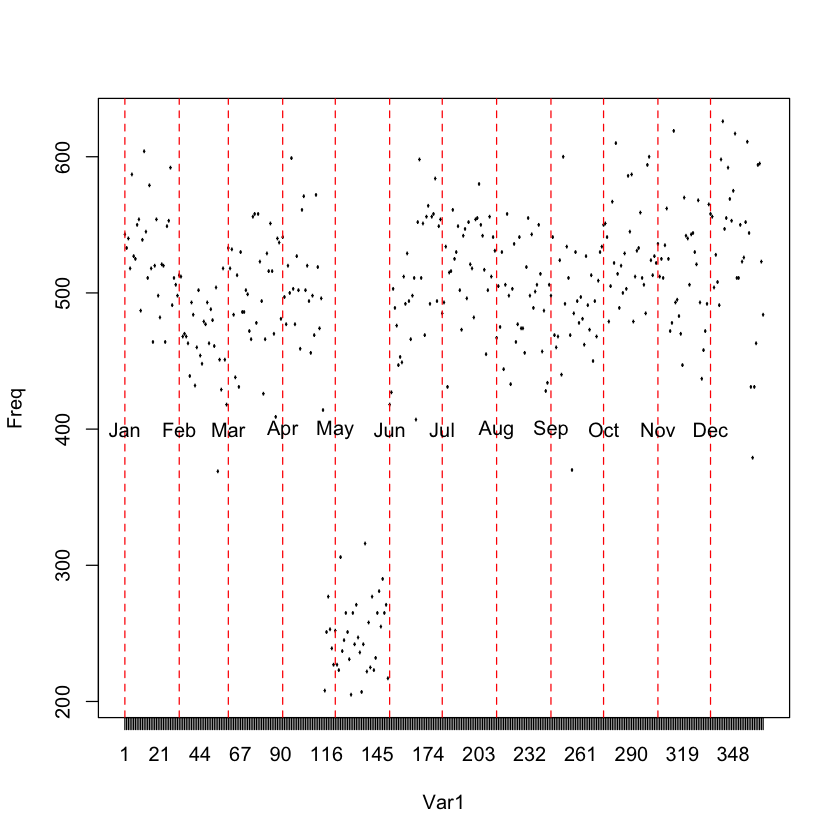

In [47]:
plot(Freq~Var1, data =DayofYear)
days = 1
for(i in 1:length(DaysinMonth)){
    abline(v =days, col = "red", lty =2)
    text(days,400, substr(format(ISOdate(2004,1:12,1),"%B")[i],1,3))
    days = days+DaysinMonth[i]
    }